In [ ]:
!pip install google-play-scraper nltk wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from google_play_scraper import reviews_all, Sort
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download(['punkt', 'stopwords', 'vader_lexicon','punkt_tab'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:

from google_play_scraper import app, reviews, Sort, reviews_all

scrapreview = reviews_all(
    'com.levelinfinite.sgameGlobal',
    lang='en',
    country='sg',
    sort=Sort.MOST_RELEVANT
    # count=10
)

In [ ]:
df = pd.DataFrame(scrapreview)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4a39dcb7-5e7d-4b25-a51a-7debb7b8dd75,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Pretty fun, it has nice graphics and character...",4,194,10.2.1.7,2025-02-16 07:54:42,None,NaT,10.2.1.7
1,c0b41acd-b1a9-4d63-b069-871742840f4c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I've been playing this game for so many months...,1,354,10.1.1.15,2024-12-13 17:28:13,"Hi player,\nYou can click on the network diagn...",2024-12-15 09:56:45,10.1.1.15
2,98ad5970-2e94-4601-8a33-fc38243d9843,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Games is good, the teams you get? Worse than c...",2,87,10.2.1.3,2025-01-26 23:06:12,"Hi player, \nThe system will randomly match pl...",2025-01-28 02:33:36,10.2.1.3
3,b0e6e032-b5ec-41db-88b3-8370c317dda7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Overall the gameplay, the graphics, and the ev...",5,2513,10.1.1.9,2024-11-07 15:54:16,None,NaT,10.1.1.9
4,93692753-ef3c-41ab-8899-747a835e189e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,For a game that has been around for quite a wh...,4,843,10.1.1.1,2024-10-17 17:07:28,"Hi player, \nWe are sorry for the situation yo...",2024-08-24 10:17:11,10.1.1.1
...,...,...,...,...,...,...,...,...,...,...,...
83015,60bfaee7-b790-4309-a9bb-3bb9d55af9c3,John kelvin Vasquez,https://play-lh.googleusercontent.com/a/ACg8oc...,❤️,5,0,None,2024-07-25 23:05:14,None,NaT,None
83016,498dd405-1c88-4cfc-9233-408813a208e3,Rueljay Jordan,https://play-lh.googleusercontent.com/a-/ALV-U...,❤️❤️❤️,5,0,None,2025-01-09 11:30:49,None,NaT,None
83017,6da47918-dc84-4600-8aff-d7dca54c9d07,Mc Rider,https://play-lh.googleusercontent.com/a/ACg8oc...,❤️,5,0,None,2024-06-28 23:39:51,None,NaT,None
83018,dc03f73b-7e41-4e29-b158-5acfce280f12,Christine Delos santos,https://play-lh.googleusercontent.com/a/ACg8oc...,🤔,2,0,None,2024-07-01 07:00:12,None,NaT,None


In [ ]:
def cleaningText(text):
    if pd.isna(text):  # Handle NaN values
        return ''
    text = str(text)  # Convert to string if not already
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.replace('\n', ' ').strip()
    return text

def casefoldingText(text):
    return text.lower()

def tokenizingText(text):
    return word_tokenize(text)

def filteringText(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

In [ ]:
df['content'] = df['content'].fillna('')  # Replace NaN with empty strings

# Then apply processing
df['clean_text'] = df['content'].apply(cleaningText)
df['tokens'] = df['clean_text'].apply(casefoldingText)\
                              .apply(tokenizingText)\
                              .apply(filteringText)
df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
def vader_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(text)

    # Compound score thresholding
    if scores['compound'] >= 0.05:
        return 'positive', scores['compound']
    elif scores['compound'] <= -0.05:
        return 'negative', scores['compound']
    else:
        return 'neutral', scores['compound']

In [ ]:
df[['sentiment', 'sentiment_score']] = df['clean_text'].apply(
    lambda x: pd.Series(vader_sentiment(x)))

In [ ]:
df.to_csv('HOK-En-VADER-Analysis.csv', index=False)

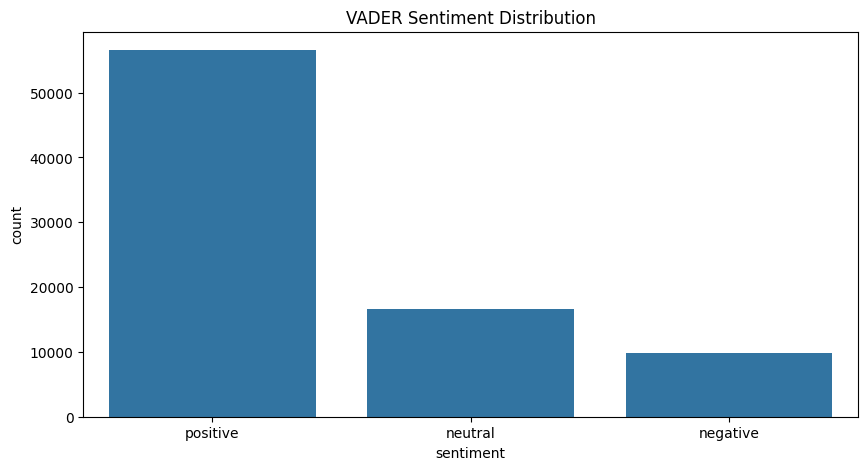

In [ ]:
# 1. Sentiment Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', data=df, order=['positive', 'neutral', 'negative'])
plt.title('VADER Sentiment Distribution')
plt.show()

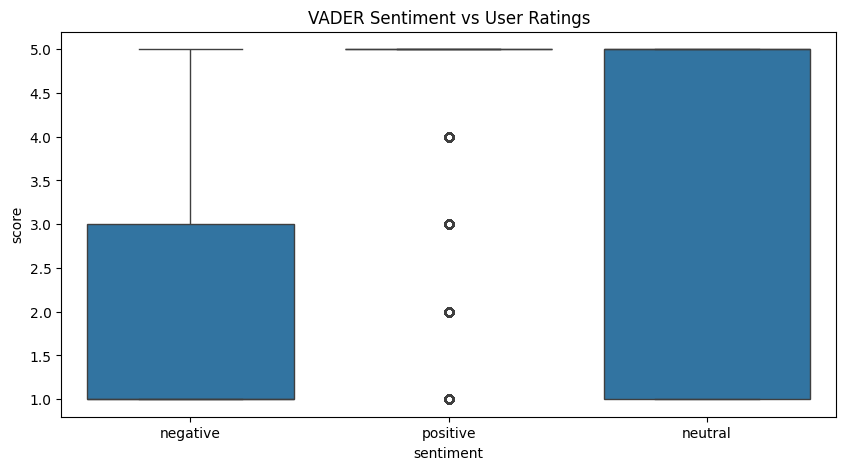

In [ ]:
# 2. Sentiment vs User Scores
plt.figure(figsize=(10, 5))
sns.boxplot(x='sentiment', y='score', data=df)
plt.title('VADER Sentiment vs User Ratings')
plt.show()

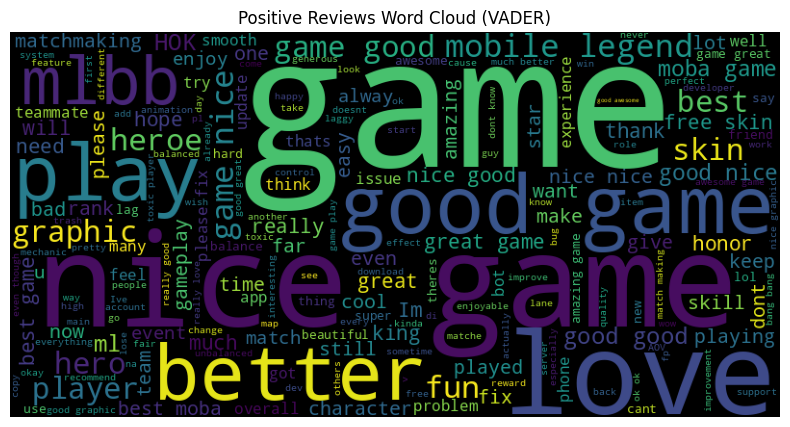

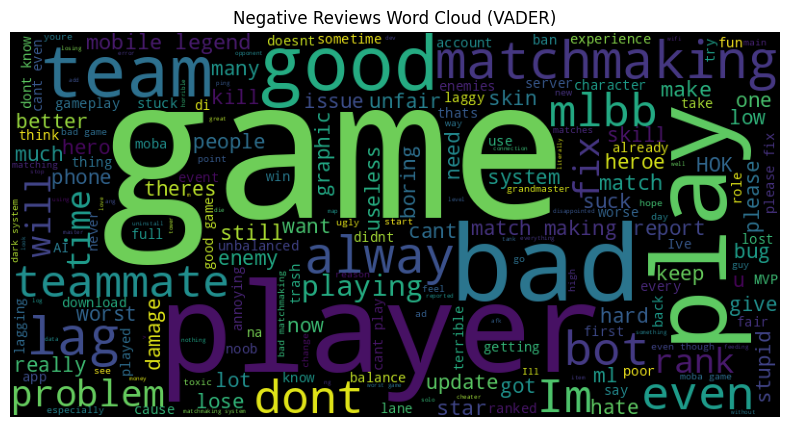

In [ ]:
# 3. Word Clouds with Sentiment Context
def generate_wordcloud(sentiment):
    text = ' '.join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.title(f'{sentiment.capitalize()} Reviews Word Cloud (VADER)')
    plt.axis('off')
    plt.show()

generate_wordcloud('positive')
generate_wordcloud('negative')

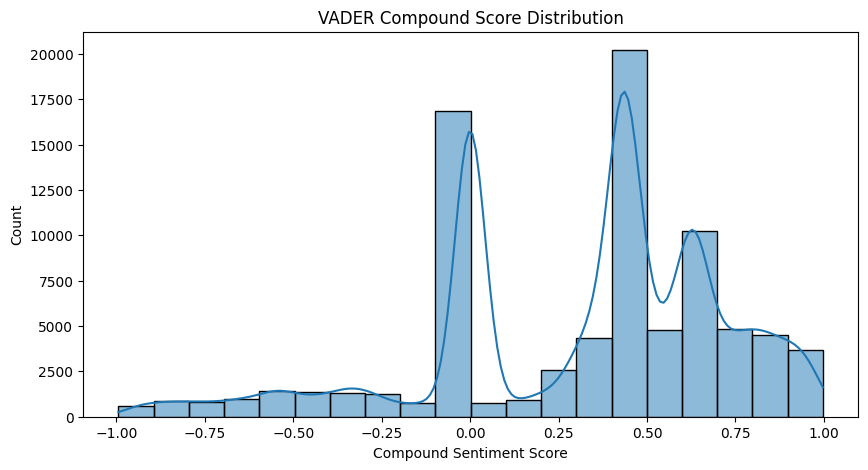

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment_score'], bins=20, kde=True)
plt.title('VADER Compound Score Distribution')
plt.xlabel('Compound Sentiment Score')
plt.show()

In [ ]:
X = df['clean_text']
y = df['sentiment']  # Using VADER-generated labels

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:

tfidf = TfidfVectorizer(
    max_features=2000,
    ngram_range=(1, 2),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000,
                                             class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced')
}
results = {}
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred),
        'cm': confusion_matrix(y_test, y_pred)
    }

    # Print metrics
    print(f"Accuracy: {results[name]['accuracy']:.2f}")
    print("Classification Report:")
    print(results[name]['report'])


--- Training Naive Bayes ---
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

    negative       0.65      0.62      0.63      1954
     neutral       0.75      0.41      0.53      3337
    positive       0.81      0.93      0.87     11313

    accuracy                           0.79     16604
   macro avg       0.74      0.65      0.68     16604
weighted avg       0.78      0.79      0.77     16604


--- Training Logistic Regression ---
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.84      0.73      1954
     neutral       0.86      0.95      0.90      3337
    positive       0.98      0.90      0.94     11313

    accuracy                           0.90     16604
   macro avg       0.83      0.90      0.86     16604
weighted avg       0.92      0.90      0.91     16604


--- Training Random Forest ---
Accuracy: 0.91
Classification Report:
              precision 

In [ ]:
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.2f}")

# Save best model and vectorizer
joblib.dump(best_model, 'hok_sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


Best Model: Random Forest with accuracy 0.91


['tfidf_vectorizer.pkl']

<Figure size 800x600 with 0 Axes>

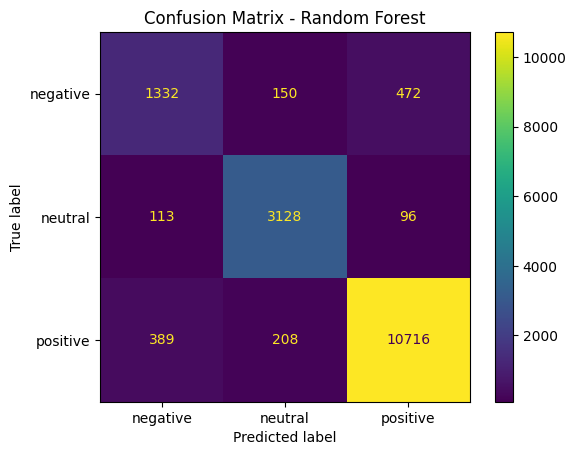

In [ ]:
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay(results[best_model_name]['cm'],
                      display_labels=best_model.classes_).plot()
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

# 2. Feature Importance (for Logistic Regression)
if best_model_name == 'Logistic Regression':
    feature_names = tfidf.get_feature_names_out()
    coefs = best_model.coef_

    plt.figure(figsize=(12, 8))
    for i, class_label in enumerate(best_model.classes_):
        top_features = sorted(zip(coefs[i], feature_names),
                            reverse=True)[:10]
        plt.subplot(3, 1, i+1)
        sns.barplot(x=[x[0] for x in top_features],
                    y=[x[1] for x in top_features])
        plt.title(f'Top Features for {class_label.capitalize()}')
    plt.tight_layout()
    plt.show()
